## Demo for modelling field dependent aberration from bead data

#### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
main_data_dir = io.param.load('datapath.yaml').main_data_dir

#### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='FD',channeltype='1ch',sysfile='Ast_Li')

#### Edit user defined parameters

In [3]:
L.param.datapath = main_data_dir+'/1ch_FD_bead/'
L.param.savename = L.param.datapath + 'psfmodel1'
L.param.keyword = 'bead' # keyword for your data file
L.param.subfolder = 'bead' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 0.47
L.param.ccd_offset = 100
L.param.FOV.z_step = 5  
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 200 # lower this number if out of memory 
L.param.roi.peak_height = 0.4
L.param.batch_size = 50
L.param.option.model.symmetric_mag = True
L.param.loss_weight.smooth = 0.03
L.param.iteration=200
L.param.PSFtype = 'zernike_vector_FD'

#### Start learning

In [4]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
psfobj,fitter = L.learn_psf(dataobj,time=0)
loc_FD = L.localize_FD(fitter) # optional step, for validating each PSF model
resfile = L.save_result(psfobj,dataobj,fitter)

E:/EMBL files/data for PSF learning/example data for uiPSF//1ch_FD_bead\astigmatism_beads_2um_10nm_1608x1608_prime95B_2\astigmatism_beads_2um_10nm_1608x1608_prime95B_2_MMStack_Default.ome.tif
E:/EMBL files/data for PSF learning/example data for uiPSF//1ch_FD_bead\astigmatism_beads_2um_10nm_1608x1608_prime95B_1\astigmatism_beads_2um_10nm_1608x1608_prime95B_1_MMStack_Default.ome.tif
(2, 201, 1608, 1608)
rois shape channel : (178, 41, 31, 31)


3/6: learning: 67/250 [03:21s]  3.00s/it, current loss: 0.64521, total time: 201.22s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.65s/it total time: 204.86s
5/6: localization: 4/4 [00:00s]  6.38it/s total time: 205.48s


outlier id: [  0   1   2   3  10  15  58  63  88 135 167 173 177]
rois shape channel : (165, 41, 31, 31)


3/6: learning: 221/250 [10:52s]  2.95s/it, current loss: 0.42975, total time: 858.35s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.64s/it total time: 861.98s
5/6: localization: 4/4 [00:00s]  7.99it/s total time: 862.48s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.25s/it total time: 3.24s
5/6: localization: 4/4 [00:00s] 15.27it/s total time: 3.50s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.27s/it total time: 3.26s
5/6: localization: 4/4 [00:00s] 10.94it/s total time: 3.62s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.24s/it total time: 3.24s
5/6: localization: 4/4 [00:00s] 11.21it/s total time: 3.59s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.24s/it total time: 3.24s
5/6: localization: 4/4 [00:00s] 12.16it/s total time: 3.57s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.23s/it total time: 3.23s
5/6: localization: 4/4 [00:00s] 10.31it/s total time: 3.61s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.25s/it total time: 3.2

#### Show results

In [3]:
f,p = io.h5.load(resfile) # load result file

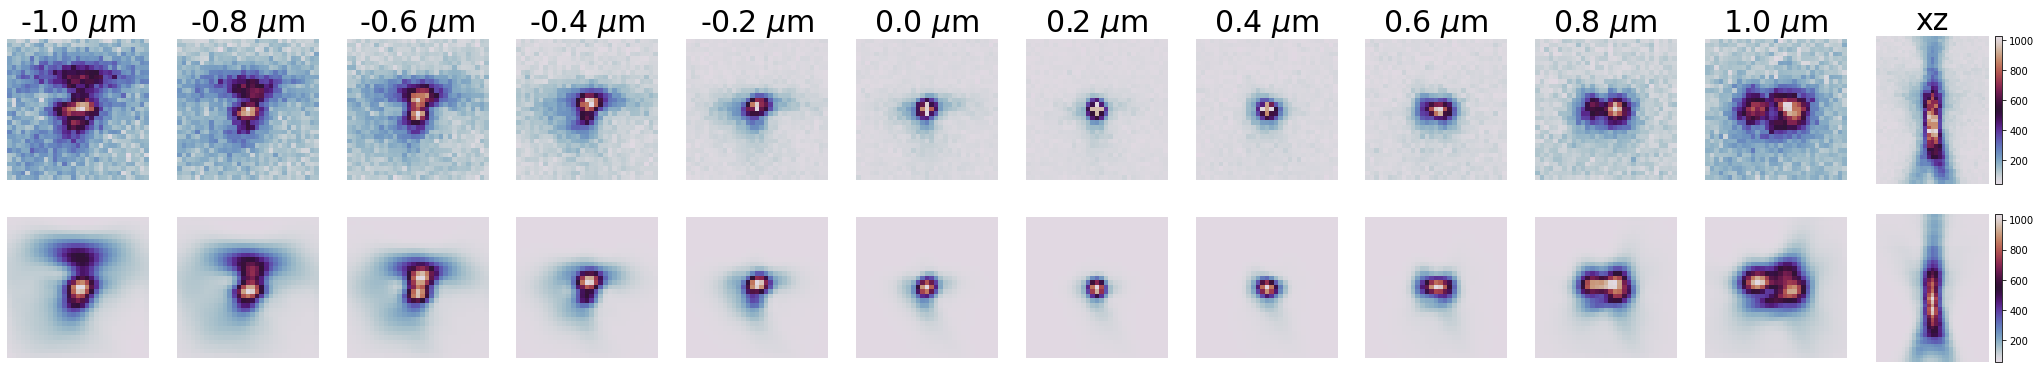

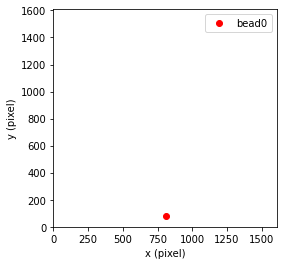

In [6]:
showpsfvsdata(f,p,index=0)

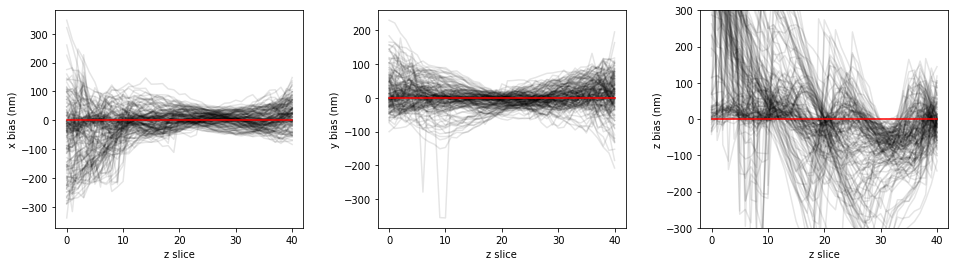

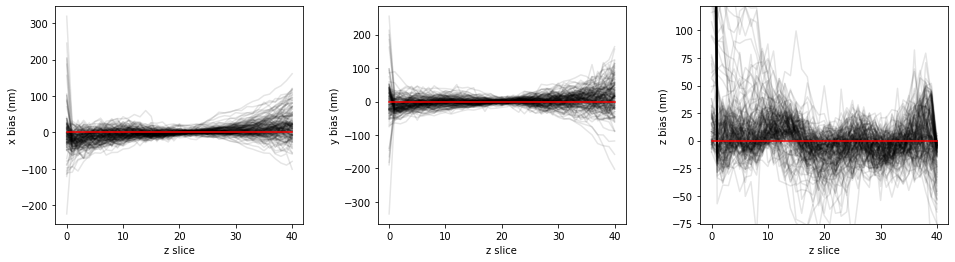

In [7]:
showlocalization(f,p)

##### Optional plots

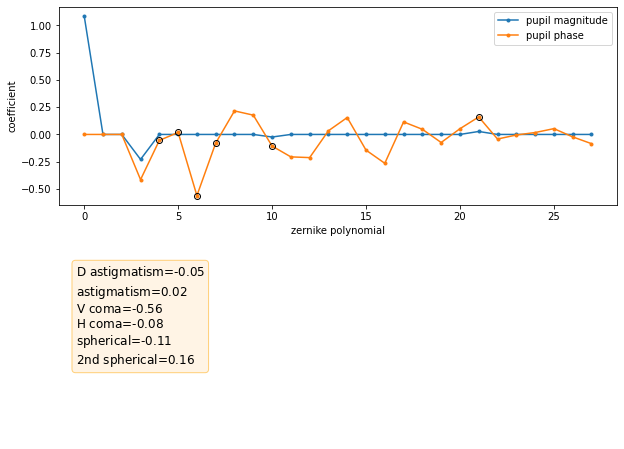

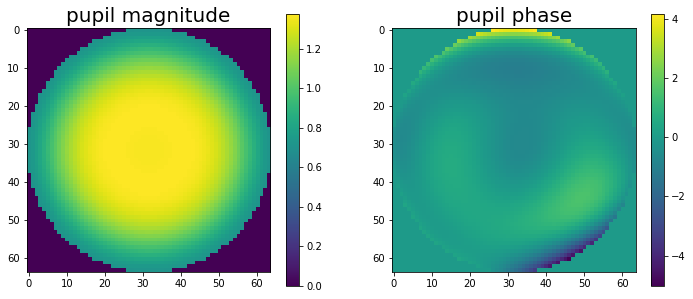

In [8]:
showzernike(f,p,index=0)

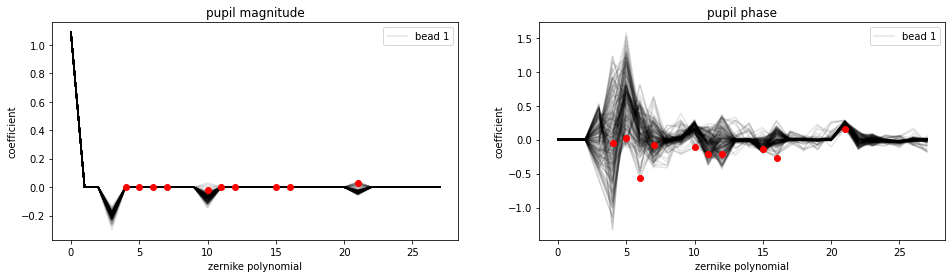

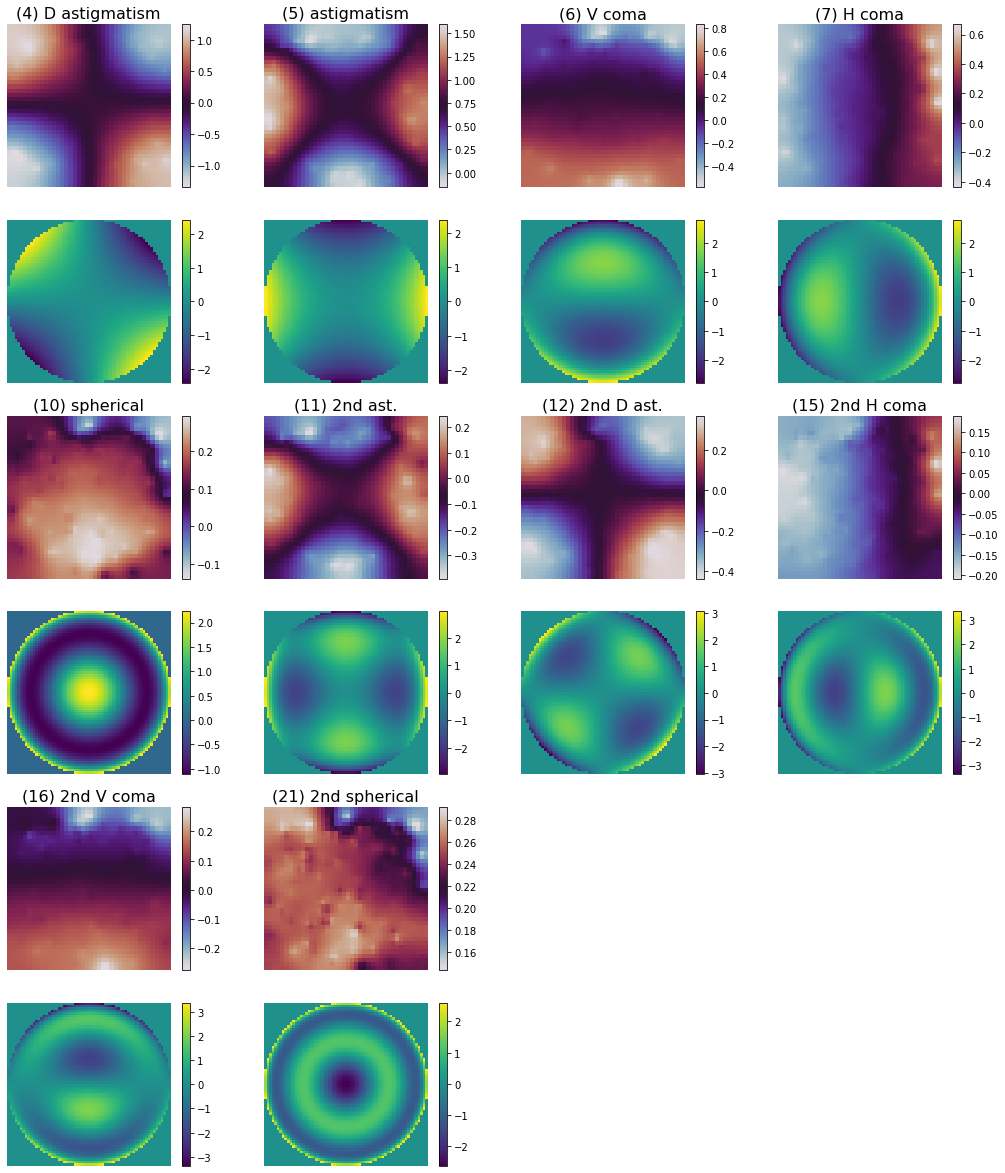

In [4]:
showzernikemap(f,p)

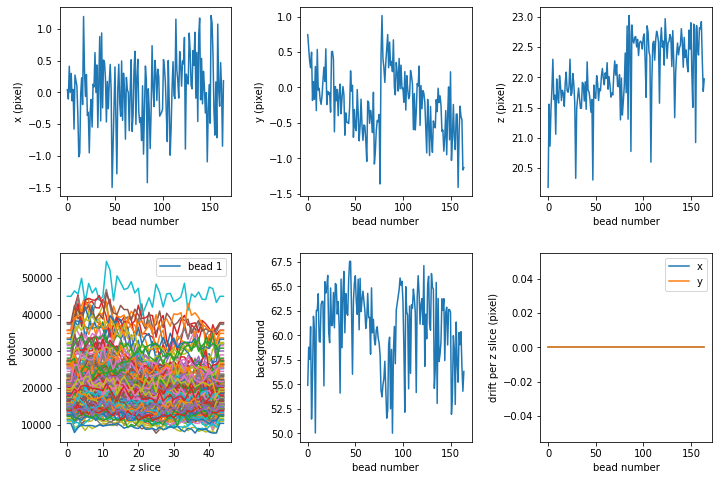

In [10]:
showlearnedparam(f,p)

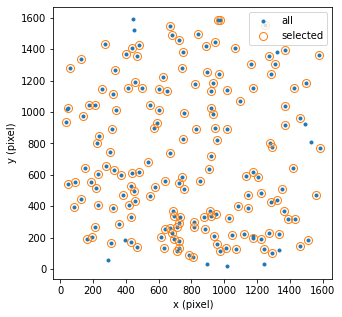

In [11]:
showcoord(f,p)

#### Ouput parameters

In [22]:
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc', 'loc_FD']
 res:
     ['I_model_all', 'I_model_bead', 'apodization', 'bg', 'cor', 'cor_all', 'drift_rate', 'intensity', 'offset', 'pos', 'pupil', 'sigma', 'zernike_coeff', 'zernike_map', 'zernike_polynomial']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']
